# Определение возраста покупателей

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

# Описание проекта  
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:  
•	Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;  
•	Контролировать добросовестность кассиров при продаже алкоголя.  
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.
Инструкция по выполнению проекта  
1.	Проведите исследовательский анализ набора фотографий.  
2.	Подготовьте данные к обучению.  
3.	Обучите нейронную сеть и рассчитайте её качество.  

Описание данных  
Данные взяты с сайта ChaLearn Looking at People. Они находятся в папке /datasets/faces/.  
В вашем распоряжении одна папка со всеми изображениями (/final_files) и csv-файл labels.csv с двумя колонками: file_name и real_age.  
Извлечь данные из папки вам поможет новый метод ImageDataGenerator —flow_from_dataframe(dataframe, directory, ...). 

## Исследовательский анализ данных

Проведите исследовательский анализ данных:
Посмотрите на размер выборки.
Постройте график распределения возраста в выборке.
Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.
Сделайте выводы о том, как результаты исследования повлияют на обучение модели.

In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [22]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
print(labels.shape)

(7591, 2)


<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, не слишком большая выборка!</div>

In [21]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [23]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Интересно, что медианный и средний возраста практически совпадают</div>

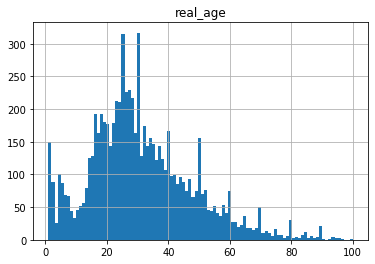

In [8]:
labels.hist(bins=100)
features, target = next(train_gen_flow)

<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Хм, пожилых людей и младенцев маловато. Моделям будет трудно...


Если по графику видна небольшая бимодальность то, cкорее всего,замешана ещё одна выборка в данных (возможно и больше). Т.е. есть некий признак, который делает гарфик двугорбым. Т.е. выборка была взята не случайна, а формировалась
</div>

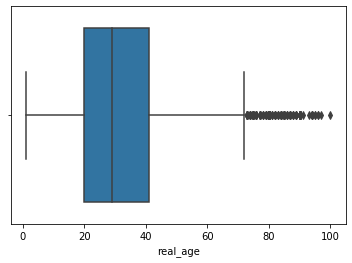

In [7]:
sns.boxplot(labels["real_age"])

In [32]:
features, target = next(train_gen_flow)

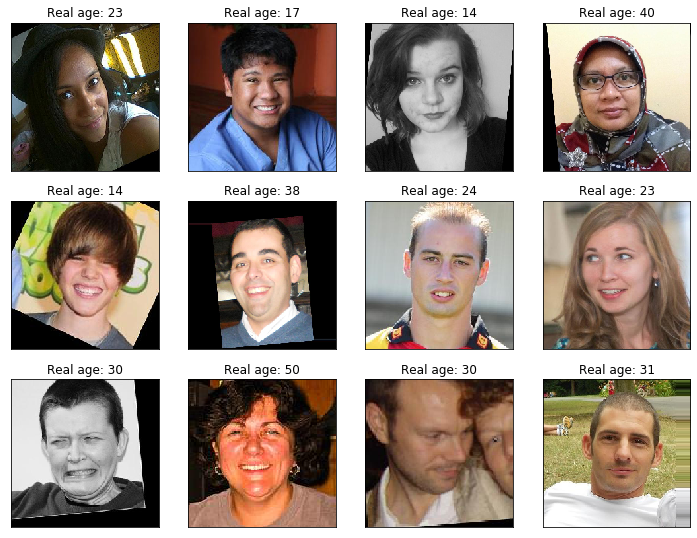

In [33]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title('Real age: ' + str(target[i]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
# < Перенесите сюда исследовательский анализ данных >

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Круто что вывел вместе с изображениями возраста:)</div>

In [34]:
features.shape

(32, 224, 224, 3)

### Вывод

Пропусков нет, данные корректны  
Можно отметить, что есть два пика возроста. От 0 до 3 лет и от 20 до 40 лет. Средний возраст на фотографии 31 год
Длина  выборки 7591 , размер изображений (244 х 244) и три канала
Есть фотографии в черно-белом изображении, и с поворотом

Для обучаюшей выборке применим аугментацию horisontal_flip

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import numpy as np
import pandas as pd
from tensorflow.keras.layers import  Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50 


def load_train(path):
    labels = pd.read_csv(path+'labels.csv')                                                     
    train_datagen = ImageDataGenerator(rescale= 1./255, 
                                       validation_split=0.25,
                                       horizontal_flip=True)  
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        horizontal_flip=True,
        seed=12345)
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path+'labels.csv')  
    test_datagen = ImageDataGenerator(rescale= 1./255, 
                                      validation_split=0.25)  
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation', 
        seed=12345)

    return test_datagen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape= input_shape,
                    weights='imagenet', 
                    include_top= False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae']) 
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data, 
              validation_data= test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model
# < скопируйте код сюда >

```

```
Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 53s - loss: 235.5858 - mae: 11.0037 - val_loss: 844.6677 - val_mae: 24.0700
Epoch 2/10
178/178 - 43s - loss: 73.9678 - mae: 6.4792 - val_loss: 810.5250 - val_mae: 23.4630
Epoch 3/10
178/178 - 42s - loss: 50.0211 - mae: 5.3516 - val_loss: 652.8581 - val_mae: 20.6665
Epoch 4/10
178/178 - 42s - loss: 37.3866 - mae: 4.6839 - val_loss: 124.0789 - val_mae: 8.3395
Epoch 5/10
178/178 - 42s - loss: 29.3720 - mae: 4.0780 - val_loss: 123.1698 - val_mae: 8.7595
Epoch 6/10
178/178 - 42s - loss: 22.3746 - mae: 3.6195 - val_loss: 72.3007 - val_mae: 6.2524
Epoch 7/10
178/178 - 42s - loss: 20.5385 - mae: 3.4768 - val_loss: 78.5683 - val_mae: 6.6553
Epoch 8/10
178/178 - 42s - loss: 16.4927 - mae: 3.0907 - val_loss: 69.5716 - val_mae: 6.4350
Epoch 9/10
178/178 - 42s - loss: 12.0187 - mae: 2.6467 - val_loss: 71.0482 - val_mae: 6.2219
Epoch 10/10
178/178 - 42s - loss: 10.5483 - mae: 2.4881 - val_loss: 61.0869 - val_mae: 5.8455


60/60 - 10s - loss: 61.0869 - mae: 5.8455
Test MAE: 5.8455


# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

```

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
По коду все гут;) Молодец, что применил аугментацию!</div>

## Анализ обученной модели

5.8455 - на столько лет в среднем ошибается модель при определении возраста.   Модель была обучена на 10 эпохах на ResNet50 с использованием алгоритма оптимизации Adam(lr=0.0001).
MAE > 8 достигается на 6 эпохе


В выборке больше всего фотографий людей в возрасте от 18 до 40 лет. Можно предположить,что  если увеличить % присутствия людей постарше и более младшего возраста , то модель может обучиться еще лучше 

Из условия задачи, модель нужна для  
• Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;  
• Контролировать добросовестность кассиров при продаже алкоголя.  
Модель вполне подходит для анализа по возрастным группам. Для контроля кассиров, точности не будет хватать.
Рекомендуется  обучить модель на выборке из большего количества изображений. С увеличением процента изображений 13-22 лет

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Хороший вывод.

Вообще круто было бы, если бы был произведен анализ ошибок -- на каких возрастах модель чаще всего ошибалась. Такой подход кландайк разных интересных открытий)

....

По проекту все гут:) Удачи в финальном проекте!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке исполнения
- [x ]  Исследовательский анализ данных выполнен
- [x ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ x]  MAE модели не больше 8
- [x ]  Код обучения модели скопирован в финальную тетрадь
- [x ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x ]  По итогам обучения модели сделаны выводы